# Challenge Técnico (Core)

<strong>Objetivo:</strong> Los estudiantes deberán participar en una competencia de Kaggle, realizar un análisis completo del dataset, entrenar y evaluar al menos cinco modelos diferentes, y realizar un benchmark para comparar su rendimiento. El resultado final debe ser subido a GitHub.

## Pasos del Challenge:

### 1. Registro en Kaggle y Elección de Competencia:

* Los estudiantes deben registrarse en Kaggle si no lo han hecho aún.
* Elegir una competencia activa que esté alineada con los conocimientos y técnicas aprendidas (por ejemplo, una competencia de clasificación o regresión).

### 2. Carga y Exploración Inicial de Datos:

* Descargar el dataset de la competencia.
* Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.
* Identificar y documentar valores faltantes y outliers.

### 3. Análisis Exploratorio de Datos (EDA):

* Calcular estadísticas descriptivas básicas.
* Crear visualizaciones para entender la distribución de las variables y sus relaciones.
* Detectar y tratar valores faltantes y outliers.

### 4. Preprocesamiento de Datos:

* Transformar las columnas según sea necesario (codificación de variables categóricas, escalado de características numéricas).
* Dividir el dataset en conjuntos de entrenamiento y prueba.

### 5. Implementación de Modelos y Benchmark:

* Entrenar y evaluar al menos cinco modelos diferentes, como Regresión Logística, K-Nearest Neighbors (KNN), Árbol de Decisión, XGBoost y LightGBM.
* Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.
* Optimizar los hiperparámetros de los modelos seleccionados utilizando GridSearchCV o RandomizedSearchCV.
* Comparar el rendimiento de los modelos utilizando métricas adecuadas.

### 6. Documentación y Entrega:

* Documentar todo el proceso en un notebook de Jupyter.
* Subir el notebook, los resultados y cualquier script adicional a un repositorio de GitHub.
* Crear un tag de liberación (v1.0.0) para esta versión del proyecto en GitHub.

# Resolución

## 1. Registro en Kaggle y Elección de Competencia:

Challenge seleccionado: [Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic)

### Descripción del Dataset

En esta competencia tu tarea es predecir si un pasajero fue transportado a una dimensión alternativa durante la colisión de la nave espacial Titanic con la anomalía espacio-temporal. Para ayudarle a hacer estas predicciones, se le proporciona un conjunto de registros personales recuperados del sistema informático dañado del barco.

Campos:

* PassengerId: Un identificador único para cada pasajero. Cada Id tiene el formato gggg_pp, donde gggg indica el grupo con el que viaja el pasajero y pp es su número dentro del grupo. Las personas en un grupo suelen ser familiares, pero no siempre.
* HomePlanet: El planeta desde el que partió el pasajero, generalmente su planeta de residencia permanente.
* CryoSleep: Indica si el pasajero eligió ser puesto en animación suspendida durante el viaje. Los pasajeros en criosueño permanecen confinados en sus cabinas.
* Cabin: El número de cabina donde se hospeda el pasajero. Tiene el formato deck/num/side, donde side puede ser P (Port/Babor) o S (Starboard/Estribor).
* Destination: El planeta al que el pasajero llegará.
* Age: La edad del pasajero.
* VIP: Indica si el pasajero pagó por un servicio VIP especial durante el viaje.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: Montos facturados por el pasajero en cada una de las muchas instalaciones de lujo del Spaceship Titanic.
* Name: Los nombres y apellidos del pasajero.
* Transported: Indica si el pasajero fue transportado a otra dimensión. Este es el objetivo, la columna que se debe predecir.

## 2. Carga y Exploración Inicial de Datos:

### Descargar el dataset de la competencia.

Dataset descargado [aquí](../data/)

### Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.

In [91]:
import pandas as pd


camino_ds = "../data/train.csv"
df = pd.read_csv(camino_ds, delimiter=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Podemos encontrar las 13 columnas mencionadas. Notamos que hay algunas columnas object que deben convertirse a su tipo correcto. También, se visualizan algunas columnas con datos nulos.

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


Analizando las columnas numéricas, lo único que se puede encontrar extraño es el gasto elevado de ciertos pasajeros. Se analizará mejor en la visualización de outliers.

##### Conversión de columnas.

Limpieza inicial.

In [93]:
from utils.eda_utils import obtener_columnas_categoricas_df, limpiar_cadena

columnas_categoricas = obtener_columnas_categoricas_df(df)


for columna in columnas_categoricas:
    df[columna] = df[columna].apply(limpiar_cadena)

Columnas booleanas.

In [94]:
columnas = df.columns.tolist()

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    [0, 1],
    [0.0, 1.0],
    ["false", "true"],
    ["No", "Yes"],
    ["no", "yes"],
    ["no", "si"],
    ["N", "Y"],
    ["n", "y"],
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "No","no", "N", "n"]:
        return False

    if x in [1, 1.0, "true", "yes", "Yes", "si", "Y", "y"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == set(posibilidad_valores_booleanos):
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

                columna_booleana_encontrada = True
                break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Valores de columna 'CryoSleep': [False True]
La columna 'CryoSleep' es booleana. Será convertida.
Valores de columna 'VIP': [False True]
La columna 'VIP' es booleana. Será convertida.
Valores de columna 'Transported': [False  True]
La columna 'Transported' es booleana. Será convertida.
Columnas convertidas a booleanas: ['CryoSleep', 'VIP', 'Transported']


In [95]:
columnas_objeto_cadena = df.select_dtypes(include=["object", "string"]).columns.tolist()


for columna in columnas_objeto_cadena:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Valores únicos para columna '{columna}': {str(valores_unicos)}")

Valores únicos para columna 'PassengerId': ['0001_01', '0002_01', '0003_01', '0003_02', '0004_01', '0005_01', '0006_01', '0006_02', '0007_01', '0008_01', '0008_02', '0008_03', '0009_01', '0010_01', '0011_01', '0012_01', '0014_01', '0015_01', '0016_01', '0017_01', '0017_02', '0020_01', '0020_02', '0020_03', '0020_04', '0020_05', '0020_06', '0022_01', '0024_01', '0025_01', '0026_01', '0028_01', '0030_01', '0031_01', '0031_02', '0031_03', '0034_01', '0035_01', '0036_01', '0038_01', '0039_01', '0041_01', '0043_01', '0044_01', '0044_02', '0044_03', '0045_01', '0045_02', '0050_01', '0051_01', '0052_01', '0053_01', '0056_01', '0056_02', '0056_03', '0058_01', '0061_01', '0062_01', '0064_01', '0064_02', '0066_01', '0067_01', '0067_02', '0067_03', '0068_01', '0069_01', '0070_01', '0071_01', '0072_01', '0073_01', '0074_01', '0076_01', '0077_01', '0078_01', '0081_01', '0082_01', '0082_02', '0082_03', '0084_01', '0085_01', '0086_01', '0088_01', '0090_01', '0091_01', '0091_02', '0092_01', '0092_02',

Convertimos las columnas a categóricas.

In [96]:
# Se elige el 5% como valor para empezar a considerar una columna como categórica.
# Si se supera esta cantidad la columna se dejará como cadena.
porcentaje_max_columnas_categoricas = 0.05
cant_filas_df = df.shape[0]

columnas_a_excluir = []
columnas_convertidas_a_categoricas = []
columnas_convertidas_a_string = []

for columna in columnas_objeto_cadena:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Cant. únicos para columna '{columna}': {len(valores_unicos)}")
    if len(valores_unicos) <= (porcentaje_max_columnas_categoricas * cant_filas_df):
        
        print(f"Valores únicos columna '{columna}': {str(valores_unicos)}")
        print(f"Se procede a convertir la columna '{columna}' a categórica")
        df[columna] = df[columna].astype("category")
        columnas_convertidas_a_categoricas.append(columna)
    else:
        print(f"No se convierte la columna '{columna}' a categórica, se opta por dejarla como string")
        df[columna] = df[columna].astype("string")
        columnas_convertidas_a_string.append(columna)

    del valores_unicos

print("\n")
print(f"Cant. de columnas analizadas: {len(columnas_objeto_cadena)}")
print(f"Cant. de columnas convertidas a category: {len(columnas_convertidas_a_categoricas)}")
print(f"Cant. de columnas convertidas a string: {len(columnas_convertidas_a_string)}")
print(f"Columnas convertidas a categóricas: {str(columnas_convertidas_a_categoricas)}")
print(f"Columnas convertidas a string: {str(columnas_convertidas_a_string)}")

Cant. únicos para columna 'PassengerId': 8693
No se convierte la columna 'PassengerId' a categórica, se opta por dejarla como string
Cant. únicos para columna 'HomePlanet': 3
Valores únicos columna 'HomePlanet': ['europa', 'earth', 'mars']
Se procede a convertir la columna 'HomePlanet' a categórica
Cant. únicos para columna 'Cabin': 6560
No se convierte la columna 'Cabin' a categórica, se opta por dejarla como string
Cant. únicos para columna 'Destination': 3
Valores únicos columna 'Destination': ['trappist-1e', 'pso j318.5-22', '55 cancri e']
Se procede a convertir la columna 'Destination' a categórica
Cant. únicos para columna 'Name': 8473
No se convierte la columna 'Name' a categórica, se opta por dejarla como string


Cant. de columnas analizadas: 5
Cant. de columnas convertidas a category: 2
Cant. de columnas convertidas a string: 3
Columnas convertidas a categóricas: ['HomePlanet', 'Destination']
Columnas convertidas a string: ['PassengerId', 'Cabin', 'Name']


Estos tres campos que fueron convertidos a string, posiblemente no sean buenos predictores ya que son o nombres, o ids de pasajero, o cabina en la que se encuentre. La excepción podría ser Cabin pero se verificará más adelante.

In [97]:
for columna in obtener_columnas_categoricas_df(df):
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Valores únicos para columna '{columna}': {str(valores_unicos)}")

Valores únicos para columna 'PassengerId': ['0001_01', '0002_01', '0003_01', '0003_02', '0004_01', '0005_01', '0006_01', '0006_02', '0007_01', '0008_01', '0008_02', '0008_03', '0009_01', '0010_01', '0011_01', '0012_01', '0014_01', '0015_01', '0016_01', '0017_01', '0017_02', '0020_01', '0020_02', '0020_03', '0020_04', '0020_05', '0020_06', '0022_01', '0024_01', '0025_01', '0026_01', '0028_01', '0030_01', '0031_01', '0031_02', '0031_03', '0034_01', '0035_01', '0036_01', '0038_01', '0039_01', '0041_01', '0043_01', '0044_01', '0044_02', '0044_03', '0045_01', '0045_02', '0050_01', '0051_01', '0052_01', '0053_01', '0056_01', '0056_02', '0056_03', '0058_01', '0061_01', '0062_01', '0064_01', '0064_02', '0066_01', '0067_01', '0067_02', '0067_03', '0068_01', '0069_01', '0070_01', '0071_01', '0072_01', '0073_01', '0074_01', '0076_01', '0077_01', '0078_01', '0081_01', '0082_01', '0082_02', '0082_03', '0084_01', '0085_01', '0086_01', '0088_01', '0090_01', '0091_01', '0091_02', '0092_01', '0092_02',

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   string  
 1   HomePlanet    8492 non-null   category
 2   CryoSleep     8693 non-null   bool    
 3   Cabin         8494 non-null   string  
 4   Destination   8511 non-null   category
 5   Age           8514 non-null   float64 
 6   VIP           8693 non-null   bool    
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   string  
 13  Transported   8693 non-null   bool    
dtypes: bool(3), category(2), float64(6), string(3)
memory usage: 654.1 KB


### Identificar y documentar valores faltantes y outliers.

##### Datos nulos

In [99]:
from utils.eda_utils import obtener_estadisticas_datos_nulos


estadisticas_datos_nulos = obtener_estadisticas_datos_nulos(df)
estadisticas_datos_nulos[estadisticas_datos_nulos["Na en q"] > 0]

,datos sin NAs en q,Na en q,Na en %
ShoppingMall,8485,208,2.39
HomePlanet,8492,201,2.31
Name,8493,200,2.30
Cabin,8494,199,2.29
VRDeck,8505,188,2.16
FoodCourt,8510,183,2.11
Spa,8510,183,2.11
Destination,8511,182,2.09
RoomService,8512,181,2.08
Age,8514,179,2.06


Al parecer, hay varias columnas con valores nulos. Se debe definir qué hacer con esas columnas de acuerdo a los tipos de datos.

##### Outliers

In [100]:
from utils.eda_utils import obtener_datos_outliers_df


obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
Age,77.0,0.904393,-9.5,66.5
RoomService,1861.0,21.863252,-70.5,117.5
FoodCourt,1823.0,21.421857,-114.0,190.0
ShoppingMall,1829.0,21.555687,-40.5,67.5
Spa,1788.0,21.010576,-88.5,147.5
VRDeck,1809.0,21.269841,-69.0,115.0


Con excepción de Age, todas las demás columnas tienen una gran cantidad de outliers.

## 3. Análisis Exploratorio de Datos (EDA)

### Calcular estadísticas descriptivas básicas.

In [101]:
from utils.eda_utils import obtener_estadisticas_descriptivas_df_es


obtener_estadisticas_descriptivas_df_es(df).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
Age,8514.0,0.0,79.0,28.827930,14.489021,27.0,0.502604
RoomService,8512.0,0.0,14327.0,224.687617,666.717663,0.0,2.967309
FoodCourt,8510.0,0.0,29813.0,458.077203,1611.489240,0.0,3.517942
ShoppingMall,8485.0,0.0,23492.0,173.729169,604.696458,0.0,3.480685
Spa,8510.0,0.0,22408.0,311.138778,1136.705535,0.0,3.653371
VRDeck,8505.0,0.0,24133.0,304.854791,1145.717189,0.0,3.758239


Podemos visualizar que en todas las columnas el coeficiente de variación es muy alto, por lo que el promedio no es significativo en este dataset. Se debe tener en cuenta al momento de imputar los datos.

Se analizan ahora las variables categóricas.

In [102]:
from utils.eda_utils import obtener_columnas_categoricas_df


columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas

['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name']

In [103]:
resumen_categorico = df.describe(include='category')

resumen_categorico.T

,count,unique,top,freq
HomePlanet,8492,3,earth,4602
Destination,8511,3,trappist-1e,5915


In [104]:
# Tutorial de creación de tabla de frecuencias.
# https://www.youtube.com/watch?v=UGV-GMIHLdY

columnas_a_analizar = [*columnas_categoricas]
columnas_a_analizar.remove("PassengerId")
columnas_a_analizar.remove("Cabin")
columnas_a_analizar.remove("Name")

for columna in columnas_a_analizar:
    # print(f"Tabla de frecuencia Columna '{columna}' vs Transported:\n")
    crosstab_column = pd.crosstab(index=df["Transported"], columns=df[columna], margins=True)
    print(f"Tabla de proporciones por columna. Columna '{columna}' vs Transported:\n")
    crosstab_column_perc_by_column = crosstab_column / crosstab_column.loc["All"]
    print(crosstab_column_perc_by_column)

Tabla de proporciones por columna. Columna 'HomePlanet' vs Transported:

HomePlanet      earth    europa      mars       All
Transported                                        
False        0.576054  0.341154  0.476976  0.496585
True         0.423946  0.658846  0.523024  0.503415
All          1.000000  1.000000  1.000000  1.000000
Tabla de proporciones por columna. Columna 'Destination' vs Transported:

Destination  55 cancri e  pso j318.5-22  trappist-1e       All
Transported                                                   
False               0.39       0.496231     0.528825  0.496416
True                0.61       0.503769     0.471175  0.503584
All                 1.00       1.000000     1.000000  1.000000


Podemos notar que las proporciones están relativamente bien distribuídas de acuerdo a los porcentajes comparado a Transported

### Crear visualizaciones para entender la distribución de las variables y sus relaciones.

#### Histogramas

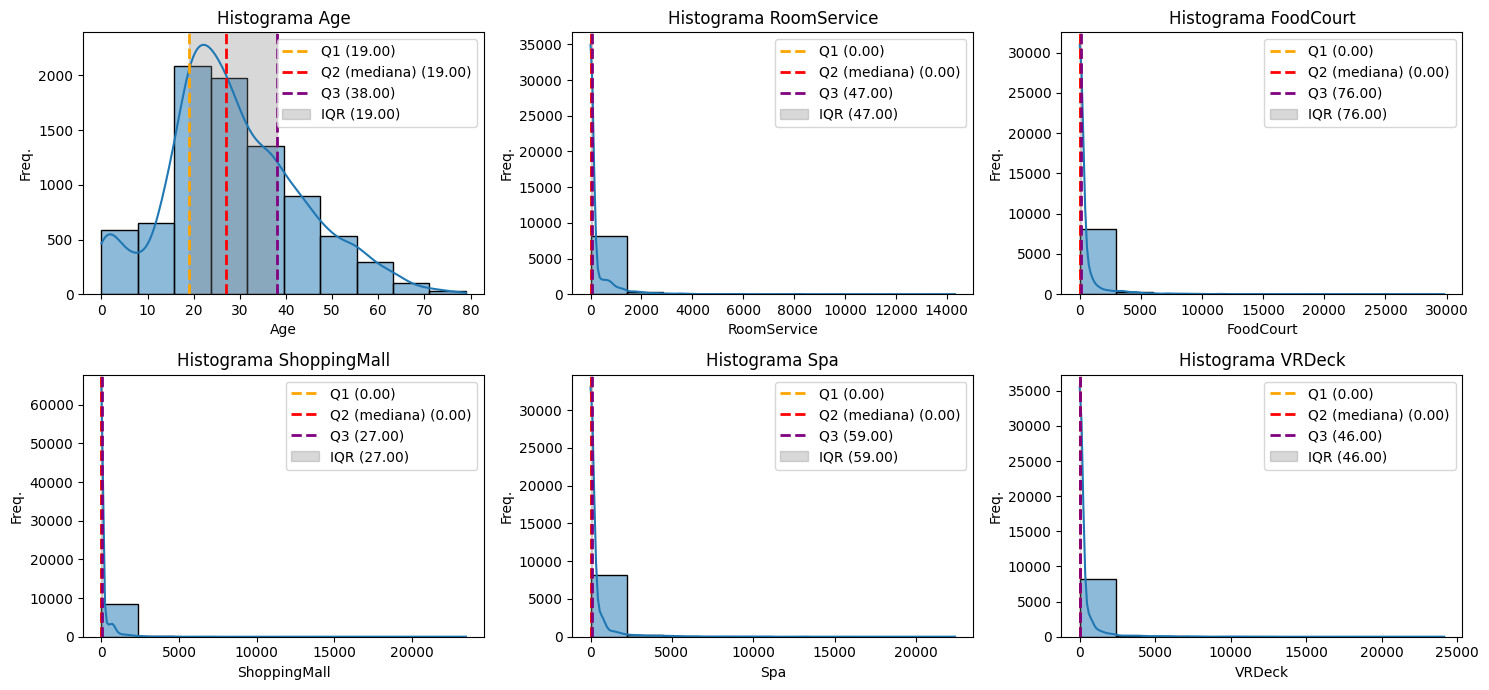

In [105]:
from utils.eda_utils import graficar_histogramas
from utils.eda_utils import obtener_columnas_numericas_df


columnas_numericas = obtener_columnas_numericas_df(df)

graficar_histogramas(df, columnas_numericas, nro_columnas=3, bins=10, kde=True, figsize=(15, 7))

De estos histogramas, sólamente age sigue una distribución approximada a la normal. Las otras columnas parece que están muy concentradas en el rango de los 0-2500. Adicionalmente, hay una gran posibilidad de que hayan muchos outliers en dichas columnas. Se confirmará con los boxplots.

#### Boxplots

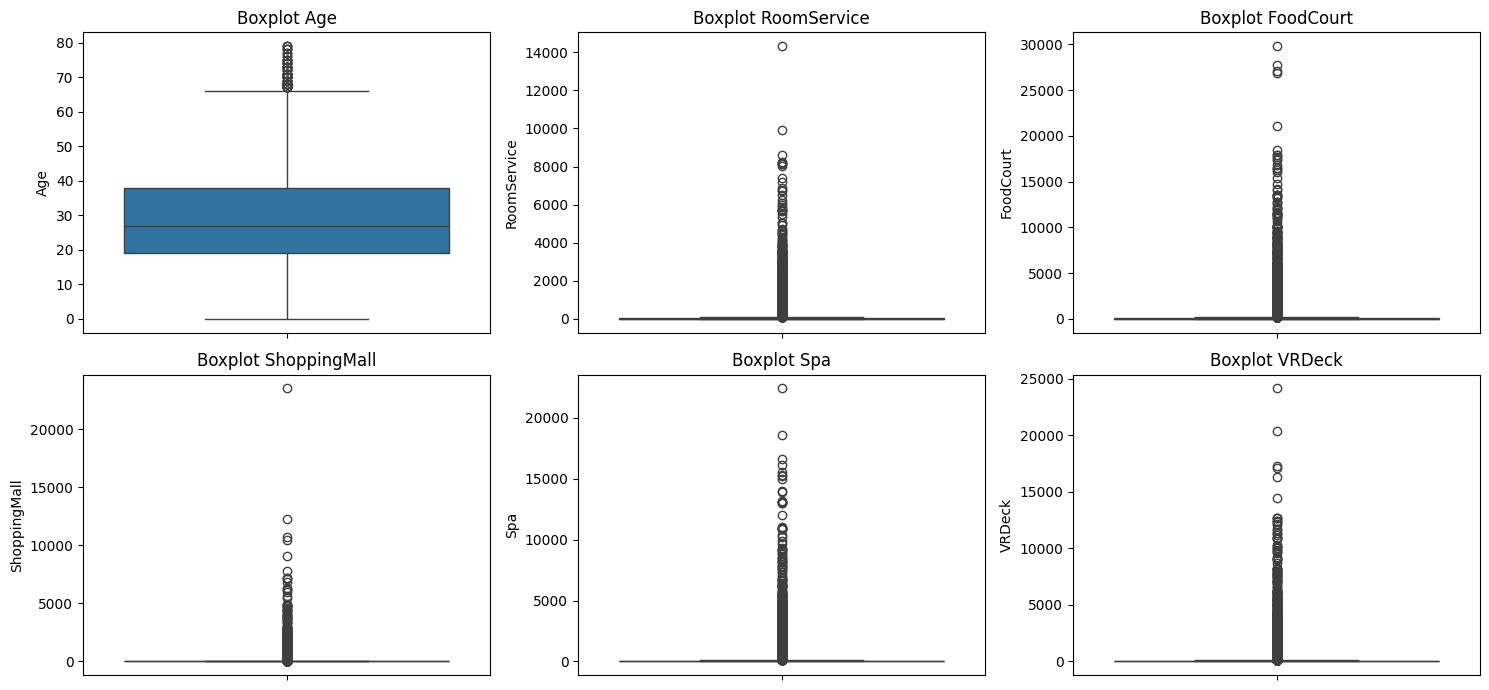

In [106]:
from utils.eda_utils import graficar_boxplots


graficar_boxplots(df, columnas_numericas, nro_columnas=3, figsize=(15, 7))

Efectivamente, existe una gran cantidad de outliers. Esto ya se pudo ver en el paso de datos estadísticos de outliers. No obstante, estos datos podrían ser valores normales ya que no son montos de gasto extremadamente altos. Y los porcentajes de outliers para estas columnas está por encima del 20%. Podría explicarse nada más con que los pasajeros tengan mayores tendencias de gastos que otros. Sí se debe tener en cuenta al momento de elegir técnicas de escalamiento.

#### Mapas de correlaciones

                      Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age              1.000000     0.068723   0.130421      0.033133  0.123970   
RoomService      0.068723     1.000000  -0.015889      0.054480  0.010080   
FoodCourt        0.130421    -0.015889   1.000000     -0.014228  0.221891   
ShoppingMall     0.033133     0.054480  -0.014228      1.000000  0.013879   
Spa              0.123970     0.010080   0.221891      0.013879  1.000000   
VRDeck           0.101007    -0.019581   0.227995     -0.007322  0.153821   
Transported Int -0.075026    -0.244611   0.046566      0.010141 -0.221131   

                   VRDeck  Transported Int  
Age              0.101007        -0.075026  
RoomService     -0.019581        -0.244611  
FoodCourt        0.227995         0.046566  
ShoppingMall    -0.007322         0.010141  
Spa              0.153821        -0.221131  
VRDeck           1.000000        -0.207075  
Transported Int -0.207075         1.000000  


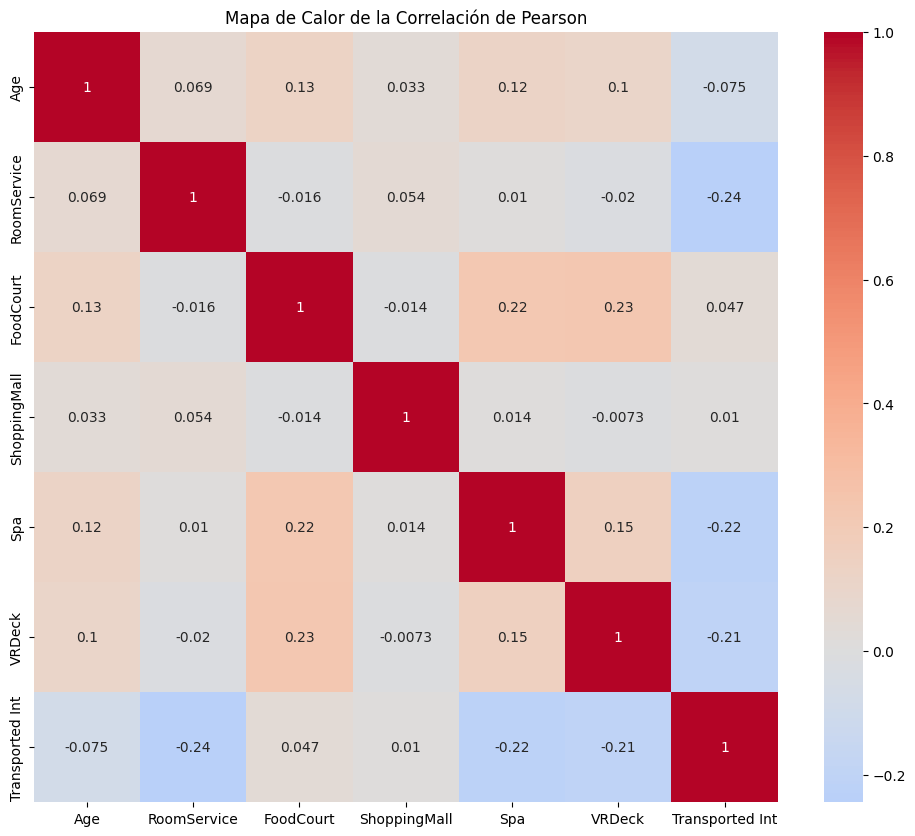

In [107]:
from utils.eda_utils import graficar_mapa_correlacion


df["Transported Int"] = df["Transported"].apply(lambda x: 1 if x else 0)


graficar_mapa_correlacion(df, columnas_numericas + ["Transported Int"], figsize=(12, 10))

df.drop("Transported Int", axis=1, inplace=True)

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


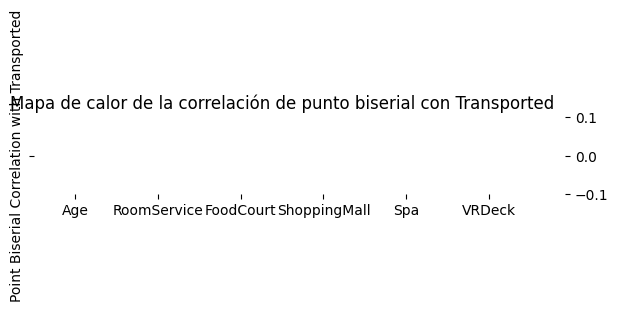

In [108]:
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns

columnas_numericas = obtener_columnas_numericas_df(df)
# Calcular la correlación de punto biserial entre Transported y las variables numéricas
corr = {col: pointbiserialr(df['Transported'], df[col])[0] for col in columnas_numericas}
# Convertir el diccionario a un DataFrame para facilitar la visualización
corr_df = pd.DataFrame.from_dict(corr, orient='index', columns=['Point Biserial Correlation with Transported'])
# Graficar el heatmap de las correlaciones de punto biserial
plt.figure(figsize=(8, 1))
sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title('Mapa de calor de la correlación de punto biserial con Transported')
plt.show()

No se encuentra ninguna correlación en las variables numéricas contra Transported.

#### Gráficos de dispersión.

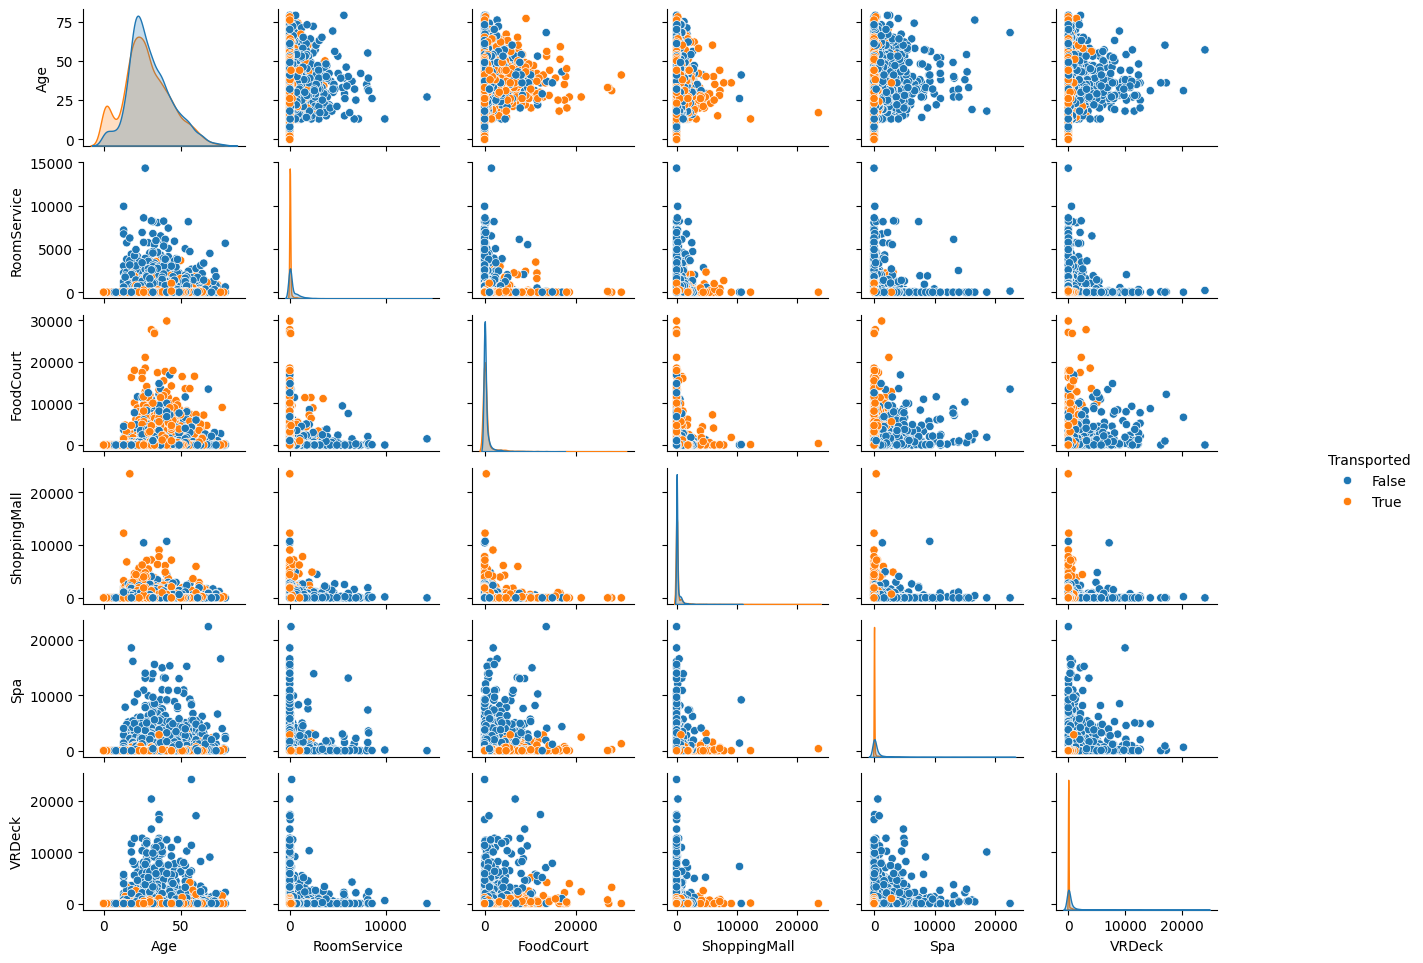

In [109]:
import matplotlib.pyplot as plt

palette = sns.color_palette("Spectral")
g = sns.pairplot(df[[*columnas_numericas] + ["Transported"]], hue='Transported', height=1.2, diag_kind = 'kde')
g.figure.set_size_inches(15, 10)
plt.show()

No se encuentran muchas correlaciones en los datos según los gráficos de dispersión También, existe mucha dispersión en todos los gráficos.

### Detectar y tratar valores faltantes y outliers.

#### Valores faltantes.

In [110]:
estadisticas_datos_nulos = obtener_estadisticas_datos_nulos(df)
estadisticas_datos_nulos[estadisticas_datos_nulos["Na en q"] > 0]

,datos sin NAs en q,Na en q,Na en %
ShoppingMall,8485,208,2.39
HomePlanet,8492,201,2.31
Name,8493,200,2.30
Cabin,8494,199,2.29
VRDeck,8505,188,2.16
FoodCourt,8510,183,2.11
Spa,8510,183,2.11
Destination,8511,182,2.09
RoomService,8512,181,2.08
Age,8514,179,2.06


In [111]:
columnas_con_nulos = estadisticas_datos_nulos[estadisticas_datos_nulos["Na en q"] > 0].T.columns.tolist()

columnas_con_nulos

['ShoppingMall',
 'HomePlanet',
 'Name',
 'Cabin',
 'VRDeck',
 'FoodCourt',
 'Spa',
 'Destination',
 'RoomService',
 'Age']

Obtenemos las estadísticas de las columnas numéricas.

In [112]:
obtener_estadisticas_descriptivas_df_es(df[[*columnas_con_nulos]]).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
ShoppingMall,8485.0,0.0,23492.0,173.729169,604.696458,0.0,3.480685
VRDeck,8505.0,0.0,24133.0,304.854791,1145.717189,0.0,3.758239
FoodCourt,8510.0,0.0,29813.0,458.077203,1611.489240,0.0,3.517942
Spa,8510.0,0.0,22408.0,311.138778,1136.705535,0.0,3.653371
RoomService,8512.0,0.0,14327.0,224.687617,666.717663,0.0,2.967309
Age,8514.0,0.0,79.0,28.827930,14.489021,27.0,0.502604


Ahora, obtenemos las estadísticas de las columnas categóricas

In [113]:
resumen_categorico = df[[*columnas_con_nulos]].describe(include='category')

resumen_categorico.T

,count,unique,top,freq
HomePlanet,8492,3,earth,4602
Destination,8511,3,trappist-1e,5915


Según los datos estadísticos, se toman las siguientes decisiones para el manejo de estos datos:

* Para todas las columnas numéricas, en el paso de imputación se usará la mediana, ya que el promedio no es representativo de acuerdo al coeficiente de variación.
* Para las columnas categóricas, se opta por llenar los nulos con unk (de Unknown).

Estas imputaciones se harán dentro del pipeline de entrenamiento.

#### Outliers.

In [114]:
obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
Age,77.0,0.904393,-9.5,66.5
RoomService,1861.0,21.863252,-70.5,117.5
FoodCourt,1823.0,21.421857,-114.0,190.0
ShoppingMall,1829.0,21.555687,-40.5,67.5
Spa,1788.0,21.010576,-88.5,147.5
VRDeck,1809.0,21.269841,-69.0,115.0


Como ya se había mencionado previamente, los outliers no parecen estar fuera de rangos esperables, por lo que se opta por mantener estos datos en el dataset. No obstante, se tendrá en cuenta la presencia de estos para elegir la técnica de escalamiento.

## 4. Preprocesamiento de Datos:

### Transformar las columnas según sea necesario (codificación de variables categóricas, escalado de características numéricas).

In [115]:
df.columns.tolist()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [116]:
columnas_prediccion = [
    # 'PassengerId',
    'HomePlanet',
    'CryoSleep',
    # 'Cabin',
    'Destination',
    'Age',
    'VIP',
    'RoomService',
    'FoodCourt',
    'ShoppingMall',
    'Spa',
    'VRDeck',
    # 'Name',
    # 'Transported',
]

campo_salida = "Transported"

X = df[[*columnas_prediccion]]
y = df[campo_salida]

Para el escalamiento, se opta por usar RobustScaler, ya que es el mejor cuando hay presencia de una gran cantidad de outliers, como se ve en este dataset.

Importamos las librerías necesarias.

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler

In [118]:
columnas_a_imputar_mediana_sin_verificar = [
    "ShoppingMall",
    "VRDeck",
    "FoodCourt",
    "Spa",
    "RoomService",
    "Age",
]

columnas_a_imputar_unk_sin_verificar = [
    "HomePlanet",
    "Destination",
]

columnas_a_imputar_mediana = []

# Sacamos solamente las columnas que fueron seleccionadas para la predicción.
for columna in columnas_a_imputar_mediana_sin_verificar:
    if columna in columnas_prediccion:
        columnas_a_imputar_mediana.append(columna)

columnas_a_imputar_unk = []

# Sacamos solamente las columnas que fueron seleccionadas para la predicción.
for columna in columnas_a_imputar_unk_sin_verificar:
    if columna in columnas_prediccion:
        columnas_a_imputar_unk.append(columna)

columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas_a_convertir_onehot = []

# Sacamos solamente las columnas que se requiera convertir a one hot,
# excluyendo las columnas ordinales.
for columna in columnas_categoricas:
    if columna in columnas_prediccion:
        columnas_categoricas_a_convertir_onehot.append(columna)

columnas_numericas = obtener_columnas_numericas_df(df)

columnas_numericas_a_escalar = []

# Obtenemos las columnas que requieren escalamiento.
for columna in columnas_numericas:
    if columna in columnas_prediccion:
        columnas_numericas_a_escalar.append(columna)

imputer_median = ColumnTransformer(
    transformers=[
        ("imputer", SimpleImputer(strategy="median"), columnas_a_imputar_mediana),
    ],
    remainder="passthrough"
)

imputer_unk_onehot = ColumnTransformer(
    transformers=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="unk"), columnas_a_imputar_unk),
    ],
    remainder="passthrough"
)

# Creamos el transformador one hot para las columnas que lo requieran.
transformer_onehot = Pipeline(steps=[
    ("imputer", imputer_unk_onehot),
    ("onehot", OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

imputer_numerical = ColumnTransformer(
    transformers=[
        ("median", SimpleImputer(strategy='median'), columnas_a_imputar_mediana),
    ],
    remainder="passthrough"
)

scaler = Pipeline(steps=[
    ("imputer", imputer_numerical),
    ("robust_scaler", RobustScaler()),
])

print(f"Columnas a imputar mediana: {str(columnas_a_imputar_mediana)}")
print(f"Columnas a imputar unk: {str(columnas_a_imputar_unk)}")

preprocessor_scale = ColumnTransformer(
    transformers=[
        (
            "scaler",
            scaler,
            columnas_numericas_a_escalar,
        ),
        (
            "onehot",
            transformer_onehot,
            columnas_categoricas_a_convertir_onehot,
        ),
    ],
    remainder="passthrough"
)

preprocessor_no_scale = ColumnTransformer(
    transformers=[
        (
            "median",
            imputer_median,
            columnas_numericas_a_escalar,
        ),
        (
            "onehot",
            transformer_onehot,
            columnas_categoricas_a_convertir_onehot,
        ),
    ],
    remainder="passthrough"
)

Columnas a imputar mediana: ['ShoppingMall', 'VRDeck', 'FoodCourt', 'Spa', 'RoomService', 'Age']
Columnas a imputar unk: ['HomePlanet', 'Destination']


Verificamos que las columnas se transforman correctamente.

In [119]:
X_transf_scale = preprocessor_scale.fit_transform(X)

df_transf_scale = pd.DataFrame(X_transf_scale, columns=preprocessor_scale.get_feature_names_out())

df_transf_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   scaler__median__ShoppingMall                8693 non-null   float64
 1   scaler__median__VRDeck                      8693 non-null   float64
 2   scaler__median__FoodCourt                   8693 non-null   float64
 3   scaler__median__Spa                         8693 non-null   float64
 4   scaler__median__RoomService                 8693 non-null   float64
 5   scaler__median__Age                         8693 non-null   float64
 6   onehot__imputer__HomePlanet_earth           8693 non-null   float64
 7   onehot__imputer__HomePlanet_europa          8693 non-null   float64
 8   onehot__imputer__HomePlanet_mars            8693 non-null   float64
 9   onehot__imputer__HomePlanet_unk             8693 non-null   float64
 10  onehot__impu

In [120]:
obtener_estadisticas_datos_nulos(df_transf_scale)

,datos sin NAs en q,Na en q,Na en %
scaler__median__ShoppingMall,8693,0,0.0
scaler__median__VRDeck,8693,0,0.0
scaler__median__FoodCourt,8693,0,0.0
scaler__median__Spa,8693,0,0.0
scaler__median__RoomService,8693,0,0.0
scaler__median__Age,8693,0,0.0
onehot__imputer__HomePlanet_earth,8693,0,0.0
onehot__imputer__HomePlanet_europa,8693,0,0.0
onehot__imputer__HomePlanet_mars,8693,0,0.0
onehot__imputer__HomePlanet_unk,8693,0,0.0


Al parecer, las transformaciones se realizan correctamente.

In [121]:
del X_transf_scale
del df_transf_scale

In [122]:
X_transf_no_scale = preprocessor_no_scale.fit_transform(X)

df_transf_no_scale = pd.DataFrame(X_transf_no_scale, columns=preprocessor_no_scale.get_feature_names_out())

df_transf_no_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   median__imputer__ShoppingMall               8693 non-null   float64
 1   median__imputer__VRDeck                     8693 non-null   float64
 2   median__imputer__FoodCourt                  8693 non-null   float64
 3   median__imputer__Spa                        8693 non-null   float64
 4   median__imputer__RoomService                8693 non-null   float64
 5   median__imputer__Age                        8693 non-null   float64
 6   onehot__imputer__HomePlanet_earth           8693 non-null   float64
 7   onehot__imputer__HomePlanet_europa          8693 non-null   float64
 8   onehot__imputer__HomePlanet_mars            8693 non-null   float64
 9   onehot__imputer__HomePlanet_unk             8693 non-null   float64
 10  onehot__impu

In [123]:
obtener_estadisticas_datos_nulos(df_transf_no_scale)

,datos sin NAs en q,Na en q,Na en %
median__imputer__ShoppingMall,8693,0,0.0
median__imputer__VRDeck,8693,0,0.0
median__imputer__FoodCourt,8693,0,0.0
median__imputer__Spa,8693,0,0.0
median__imputer__RoomService,8693,0,0.0
median__imputer__Age,8693,0,0.0
onehot__imputer__HomePlanet_earth,8693,0,0.0
onehot__imputer__HomePlanet_europa,8693,0,0.0
onehot__imputer__HomePlanet_mars,8693,0,0.0
onehot__imputer__HomePlanet_unk,8693,0,0.0


Tampoco se ven errores en las transformaciones sin escalador.

In [124]:
del X_transf_no_scale
del df_transf_no_scale

### Dividir el dataset en conjuntos de entrenamiento y prueba.

In [125]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
)

## 5. Implementación de Modelos y Benchmark:

### Entrenar y evaluar al menos cinco modelos diferentes, como Regresión Logística, K-Nearest Neighbors (KNN), Árbol de Decisión, XGBoost y LightGBM.

Importamos las librerías necesarias.

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline

#### Regresión Logística

In [129]:
lr = Pipeline(
    steps=[
        ('preprocessor', preprocessor_no_scale),
        ('model', LogisticRegression(
            penalty='l2',
            C=1.0,
            solver='lbfgs',
            max_iter=20000,
            tol=1e-4,
            random_state=42,
        ))
    ]
)

lr.fit(X_train, y_train)

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('median',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('imputer',
                                                                                   SimpleImputer(strategy='median'),
                                                                                   ['ShoppingMall',
                                                                                    'VRDeck',
                                                                                    'FoodCourt',
                                                                                    'Spa',
                                                                                    'RoomService',
                                                                                    'Age'])]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('imputer',
                                                                                                    SimpleImputer(fill_value='unk',
                                                                                                                  strategy='constant'),
                                                                                                    ['HomePlanet',
                                                                                                     'Destination'])])),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['HomePlanet',
                                                   'Destination'])])),
                ('model', LogisticRegression(max_iter=20000, random_state=42))])

#### KNN

Buscamos el mejor K con validación cruzada.

In [133]:
# Probar diferentes valores de K
k_values = list(range(1, 51))
roc_auc_scores = []

for k in k_values:
    knn = Pipeline(
        steps=[
            ("preprocessor", preprocessor_scale),
            ("model", KNeighborsClassifier(n_neighbors=k))
        ]
    )
    scores = cross_val_score(knn, X_train, y_train, scoring='roc_auc', cv=10)
    roc_auc_scores.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k = k_values[roc_auc_scores.index(max(roc_auc_scores))]
print(f'Mejor valor de K: {best_k}')

Mejor valor de K: 40


Visualizamos el ROC/Auc a medida que incrementa K

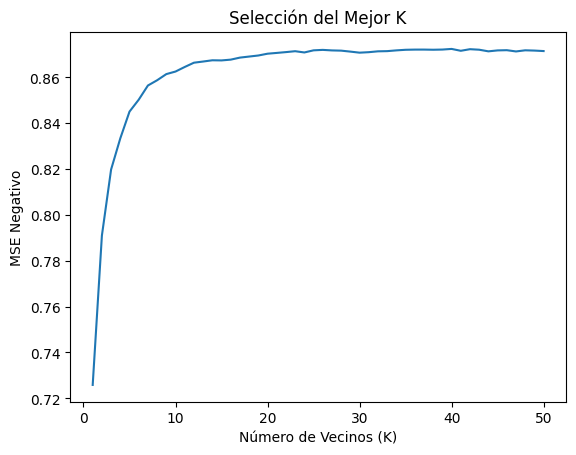

In [134]:
plt.plot(k_values, roc_auc_scores)
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('MSE Negativo')
plt.title('Selección del Mejor K')
plt.show()

Del gráfico, se puede notar que más o menos a partir de K=20 ya se obtienen nada más mejoras marginales, por lo que se elige este valor para el entrenamiento inicial.

In [135]:
# Entrenar el modelo KNN

knn = Pipeline(
    steps=[
        ('preprocessor', preprocessor_scale),
        ('model', KNeighborsClassifier(n_neighbors=20))
    ]
)

knn.fit(X_train, y_train)

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('imputer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('median',
                                                                                                    SimpleImputer(strategy='median'),
                                                                                                    ['ShoppingMall',
                                                                                                     'VRDeck',
                                                                                                     'FoodCourt',
                                                                                                     'Spa',
                                                                                                     'RoomService',
                                                                                                     'Age'])])),
                                                                  ('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'RoomService',
                                                   'F...
                                                   'Spa', 'VRDeck']),
                                                 ('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('imputer',
                                                                                                    SimpleImputer(fill_value='unk',
                                                                                                                  strategy='constant'),
                                                                                                    ['HomePlanet',
                                                                                                     'Destination'])])),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['HomePlanet',
                                                   'Destination'])])),
                ('model', KNeighborsClassifier(n_neighbors=20))])

#### Árbol de Decisión

In [136]:
# Entrenar el modelo Árbol de Decisión
dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor_no_scale),
        ('model', DecisionTreeClassifier(random_state=42))
    ]
)

dt.fit(X_train, y_train)

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('median',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('imputer',
                                                                                   SimpleImputer(strategy='median'),
                                                                                   ['ShoppingMall',
                                                                                    'VRDeck',
                                                                                    'FoodCourt',
                                                                                    'Spa',
                                                                                    'RoomService',
                                                                                    'Age'])]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('imputer',
                                                                                                    SimpleImputer(fill_value='unk',
                                                                                                                  strategy='constant'),
                                                                                                    ['HomePlanet',
                                                                                                     'Destination'])])),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['HomePlanet',
                                                   'Destination'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

#### Random Forests

In [137]:
rf = Pipeline(
    steps=[
        ('preprocessor', preprocessor_no_scale),
        ('model', RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42))
    ]
)

rf.fit(X_train, y_train)

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('median',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('imputer',
                                                                                   SimpleImputer(strategy='median'),
                                                                                   ['ShoppingMall',
                                                                                    'VRDeck',
                                                                                    'FoodCourt',
                                                                                    'Spa',
                                                                                    'RoomService',
                                                                                    'Age'])]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('imputer',
                                                                                                    SimpleImputer(fill_value='unk',
                                                                                                                  strategy='constant'),
                                                                                                    ['HomePlanet',
                                                                                                     'Destination'])])),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['HomePlanet',
                                                   'Destination'])])),
                ('model',
                 RandomForestClassifier(max_depth=3, n_estimators=10,
                                        random_state=42))])

#### LGBM

In [138]:
import lightgbm as lgb

lgbm = Pipeline(steps=[
    ("preprocessor", preprocessor_no_scale),
    ("model", lgb.LGBMClassifier(random_state=42))
])

lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3059, number of negative: 3026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1373
[LightGBM] [Info] Number of data points in the train set: 6085, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502712 -> initscore=0.010846
[LightGBM] [Info] Start training from score 0.010846


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('median',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('imputer',
                                                                                   SimpleImputer(strategy='median'),
                                                                                   ['ShoppingMall',
                                                                                    'VRDeck',
                                                                                    'FoodCourt',
                                                                                    'Spa',
                                                                                    'RoomService',
                                                                                    'Age'])]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('imputer',
                                                                                                    SimpleImputer(fill_value='unk',
                                                                                                                  strategy='constant'),
                                                                                                    ['HomePlanet',
                                                                                                     'Destination'])])),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['HomePlanet',
                                                   'Destination'])])),
                ('model', LGBMClassifier(random_state=42))])

#### XGBoost

In [139]:
import xgboost as xgb
from sklearn.pipeline import Pipeline

xb = Pipeline(steps=[
    ("preprocessor", preprocessor_no_scale),
    ("model", xgb.XGBClassifier(eval_metric='logloss', random_state=42))
])

xb.fit(X_train, y_train)

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('median',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('imputer',
                                                                                   SimpleImputer(strategy='median'),
                                                                                   ['ShoppingMall',
                                                                                    'VRDeck',
                                                                                    'FoodCourt',
                                                                                    'Spa',
                                                                                    'RoomService',
                                                                                    'Age'])]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('onehot',
                                                  Pipeline(s...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

### Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.

In [141]:
score_lr = cross_val_score(lr, X_train, y_train, cv=5).mean()
score_knn = cross_val_score(knn, X_train, y_train, cv=5).mean()
score_dt = cross_val_score(dt, X_train, y_train, cv=5).mean()
score_rf = cross_val_score(rf, X_train, y_train, cv=5).mean()
score_lgbm = cross_val_score(lgbm, X_train, y_train, cv=5).mean()
score_xb = cross_val_score(xb, X_train, y_train, cv=5).mean()

print("\n")
print(f"Promedio score Regresión Logística: {score_lr}")
print(f"Promedio score K Nearest Neighbor: {score_knn}")
print(f"Promedio score Árbol de Decisión: {score_dt}")
print(f"Promedio score Random Forests: {score_lgbm}")
print(f"Promedio score LGBM: {score_rf}")
print(f"Promedio score XBoost: {score_rf}")

[LightGBM] [Info] Number of positive: 2447, number of negative: 2421
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1371
[LightGBM] [Info] Number of data points in the train set: 4868, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502671 -> initscore=0.010682
[LightGBM] [Info] Start training from score 0.010682
[LightGBM] [Info] Number of positive: 2447, number of negative: 2421
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1373
[LightGBM] [Info] Number of data points in the train set: 4868, number of used features: 16
[LightGBM] [Info] [binary:

De los modelos entrenados, los que tienen mejor performance son el KNN y el Random Forests, por lo cual, se seleccionan estos dos inicialmente.

### Optimizar los hiperparámetros de los modelos seleccionados utilizando GridSearchCV o RandomizedSearchCV.

Se opta por utilizar GridSearchCV ya que el dataset es pequeño.

Importamos las librerias necesarias.

In [143]:
from sklearn.model_selection import GridSearchCV

#### KNN

In [144]:
knn_gscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor_scale),
        ('model', GridSearchCV(
            KNeighborsClassifier(),
            param_grid={
                'n_neighbors': list(range(1, 101)),
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)

knn_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END .....................................

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('imputer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('median',
                                                                                                    SimpleImputer(strategy='median'),
                                                                                                    ['ShoppingMall',
                                                                                                     'VRDeck',
                                                                                                     'FoodCourt',
                                                                                                     'Spa',
                                                                                                     'RoomService',
                                                                                                     'Age'])])),
                                                                  ('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'RoomService',
                                                   'F...
                                                                                                    SimpleImputer(fill_value='unk',
                                                                                                                  strategy='constant'),
                                                                                                    ['HomePlanet',
                                                                                                     'Destination'])])),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['HomePlanet',
                                                   'Destination'])])),
                ('model',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                              param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20, 21, 22, 23,
                                                          24, 25, 26, 27, 28,
                                                          29, 30, ...]},
                              verbose=2))])

In [147]:
params = knn_gscv.steps[-1][1].best_params_

params

{'n_neighbors': 29}

#### Random Forests

In [146]:
rf_gscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor_no_scale),
        ('model', GridSearchCV(
            RandomForestClassifier(random_state=42),
            param_grid={ 
                'n_estimators': list(range(1, 50)),
                'max_depth': list(range(1, 10)),
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)

rf_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 441 candidates, totalling 2205 fits
[CV] END ........................max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=3; total time=   0.0s
[CV] END ........................max_depth=1,

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('median',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('imputer',
                                                                                   SimpleImputer(strategy='median'),
                                                                                   ['ShoppingMall',
                                                                                    'VRDeck',
                                                                                    'FoodCourt',
                                                                                    'Spa',
                                                                                    'RoomService',
                                                                                    'Age'])]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('onehot',
                                                  Pipeline(s...
                                                                                                     'Destination'])])),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['HomePlanet',
                                                   'Destination'])])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(random_state=42),
                              param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9],
                                          'n_estimators': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, ...]},
                              verbose=2))])

In [148]:
params = rf_gscv.steps[-1][1].best_params_

params

{'max_depth': 9, 'n_estimators': 18}

### Comparar el rendimiento de los modelos utilizando métricas adecuadas.

Importamos las librerías necesarias.

In [150]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
)

from utils.classification_utils import graficar_matrices_confusion

Obtenemos el reporte de clasificación para ambos modelos.

In [151]:
y_pred_knn = knn_gscv.predict(X_test)
y_pred_rf = rf_gscv.predict(X_test)

classification_report_knn = classification_report(y_test, y_pred_knn)
classification_report_rf = classification_report(y_test, y_pred_rf)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

Imprimimos los reporte de clasificación

In [152]:
print("Repote Clasificación KNN")
print(classification_report_knn)
print("\n")

print("Repote Clasificación RF")
print(classification_report_rf)
print("\n")

Repote Clasificación KNN
              precision    recall  f1-score   support

       False       0.82      0.72      0.77      1289
        True       0.76      0.84      0.80      1319

    accuracy                           0.78      2608
   macro avg       0.79      0.78      0.78      2608
weighted avg       0.79      0.78      0.78      2608



Repote Clasificación RF
              precision    recall  f1-score   support

       False       0.81      0.75      0.78      1289
        True       0.77      0.83      0.80      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608





Graficamos las matrices de confusión

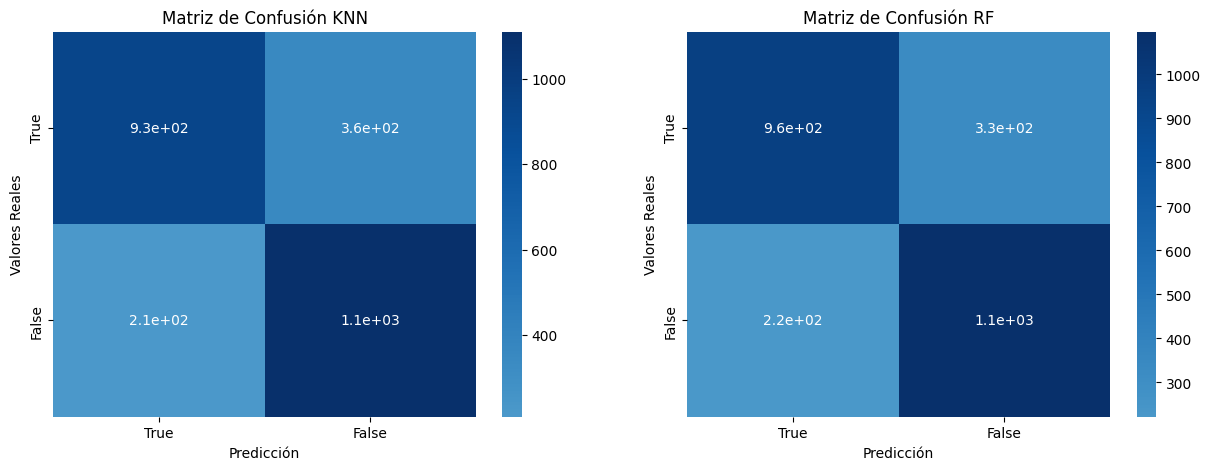

In [155]:
graficar_matrices_confusion(
    [conf_matrix_knn, conf_matrix_rf],
    ["KNN", "RF"],
    labels=["True", "False"],
    nro_columnas=2,
    figsize=(15, 5),
)

Graficamos las curvas ROC/AUC

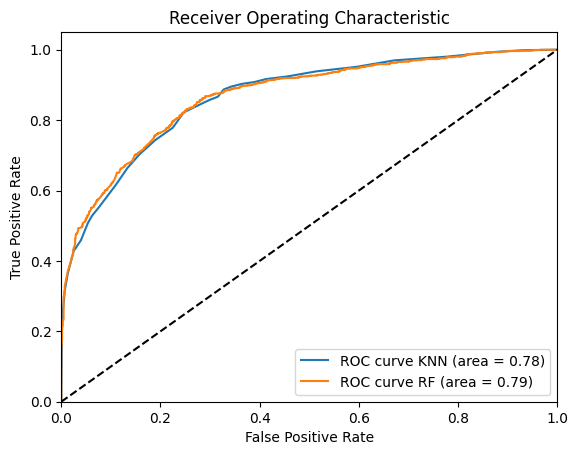

In [158]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_knn = knn_gscv.predict(X_test)
y_prob_knn = knn_gscv.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

y_pred_rf = rf_gscv.predict(X_test)
y_prob_rf = rf_gscv.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Curva ROC y AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_pred_knn)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr_knn, tpr_knn, label='ROC curve KNN (area = %0.2f)' % auc_knn)
plt.plot(fpr_rf, tpr_rf, label='ROC curve RF (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Conclusiones

De los resultados del reporte de clasificación podemos concluír lo siguiente:

* Teniendo en cuenta la precision, el recall y el f1-score, el mejor modelo entre los dos elegidos es el de Random Forests.
* La matriz de confusión también da mayores aciertos para la clase True y se nota una tasa de False un poco menor en la predicción de True, no obstante, también se puede visualizar que en la clase False hay un leve incremento de predicciones True.
* De las curvas ROC/AUC también podemos notar que el modelo RF es un poco mejor.
* En general, el mejor modelo, y por ende el modelo seleccionado, es el de Random Forests.